In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import manifold
plt.rc('font',family='Times New Roman')

In [2]:
def 降维(subdata):
    X = subdata[0] + subdata[1]
    X = np.array(X)
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
    X_tsne = tsne.fit_transform(X)
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)

    return X_norm

In [3]:
def 作图(X_norm, title, loc):
    c = ['b'] * 2000 + ['r'] * 2000
    plt.subplot(loc)
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=c, s=0.5, marker='o', alpha=0.3)
    # plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(title, font={'size':8, 'family':'Times New Roman'})

In [4]:
bins_data = pd.read_pickle("./bins.pkl")
bins_X_norm_1 = 降维(bins_data[1])
bins_X_norm_2 = 降维(bins_data[2])
bins_X_norm_3 = 降维(bins_data[3])

flc_data = pd.read_pickle("./FLC.pkl")
flc_X_norm_1 = 降维(flc_data[1])
flc_X_norm_2 = 降维(flc_data[2])
flc_X_norm_3 = 降维(flc_data[3])

mgls_data = pd.read_pickle("./JointSpace14.pkl")
mgls_X_norm_1 = 降维(mgls_data[1])
mgls_X_norm_2 = 降维(mgls_data[2])
mgls_X_norm_3 = 降维(mgls_data[3])

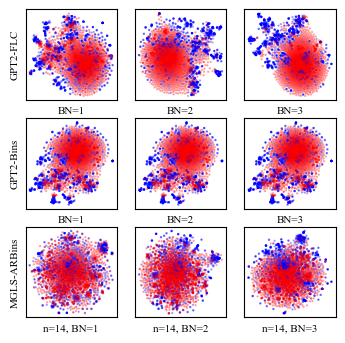

In [5]:
plt.rc('font',family='Times New Roman')

plt.figure(figsize=[4,4])

作图(flc_X_norm_1, title='BN=1', loc=331)
plt.ylabel('GPT2-FLC', font={'size':8, 'family':'Times New Roman'})
作图(flc_X_norm_2, title='BN=2', loc=332)
# plt.title('GPT-FLC', loc='center')
作图(flc_X_norm_3, title='BN=3', loc=333)

作图(bins_X_norm_1, title='BN=1', loc=334)
plt.ylabel('GPT2-Bins', font={'size':8, 'family':'Times New Roman'})
作图(bins_X_norm_1, title='BN=2', loc=335)
# plt.title('GPT-Bins', loc='center')
作图(bins_X_norm_1, title='BN=3', loc=336)


作图(mgls_X_norm_1, title='n=14, BN=1', loc=337)
plt.ylabel('MGLS-ARBins', font={'size':8, 'family':'Times New Roman'})
作图(mgls_X_norm_2, title='n=14, BN=2', loc=338)
# plt.title('MGLS', loc='center')
作图(mgls_X_norm_3, title='n=14, BN=3', loc=339)

# 保存图片
# plt.tight_layout(h_pad=0.3)
# plt.savefig('./Doc2Vec_v3.png',bbox_inches='tight', pad_inches = 0.02, dpi=300)